# LINE Plot
- Depicts a continuous relationship between 2 values
- Often one of the 2 values is time and plotted on X-axis, making it easy to spot trends/seasonality
- If there are more than one measure at any given point in time, we can also generate confidence interval of the y value using sns

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/00482/dataset.zip
!unzip dataset.zip

--2023-01-10 21:05:59--  https://archive.ics.uci.edu/ml/machine-learning-databases/00482/dataset.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 240539 (235K) [application/x-httpd-php]
Saving to: 'dataset.zip'

dataset.zip         100%[===================>] 234.90K  22.0KB/s    in 11s     

2023-01-10 21:06:13 (22.0 KB/s) - 'dataset.zip' saved [240539/240539]

Archive:  dataset.zip
  inflating: dataset.csv             


In [6]:
pd.read_csv('dataset.csv')

,SystemCodeNumber,Capacity,Occupancy,LastUpdated
0,BHMBCCMKT01,577,61,2016-10-04 07:59:42
1,BHMBCCMKT01,577,64,2016-10-04 08:25:42
2,BHMBCCMKT01,577,80,2016-10-04 08:59:42
3,BHMBCCMKT01,577,107,2016-10-04 09:32:46
4,BHMBCCMKT01,577,150,2016-10-04 09:59:48
...,...,...,...,...
35712,Shopping,1920,1517,2016-12-19 14:30:33
35713,Shopping,1920,1487,2016-12-19 15:03:34
35714,Shopping,1920,1432,2016-12-19 15:29:33
35715,Shopping,1920,1321,2016-12-19 16:03:35


In [7]:
pd.read_csv('dataset.csv').dtypes

SystemCodeNumber    object
Capacity             int64
Occupancy            int64
LastUpdated         object
dtype: object

In [16]:
df = pd.read_csv('dataset.csv', parse_dates=['LastUpdated'])

In [17]:
df.head(3)

,SystemCodeNumber,Capacity,Occupancy,LastUpdated
0,BHMBCCMKT01,577,61,2016-10-04 07:59:42
1,BHMBCCMKT01,577,64,2016-10-04 08:25:42
2,BHMBCCMKT01,577,80,2016-10-04 08:59:42


In [18]:
df.dtypes

SystemCodeNumber            object
Capacity                     int64
Occupancy                    int64
LastUpdated         datetime64[ns]
dtype: object

In [21]:
df.rename(columns=dict(SystemCodeNumber='Location', LastUpdated='Timestamp'), inplace=True)

In [23]:
df['Day'] = df.Timestamp.dt.date
df['Month'] = df.Timestamp.dt.month
df['Hour'] = df.Timestamp.dt.hour

In [34]:
df.head()

,Location,Capacity,Occupancy,Timestamp,Day,Month,Hour
0,BHMBCCMKT01,577,61,2016-10-04 07:59:42,2016-10-04,10,7
1,BHMBCCMKT01,577,64,2016-10-04 08:25:42,2016-10-04,10,8
2,BHMBCCMKT01,577,80,2016-10-04 08:59:42,2016-10-04,10,8
3,BHMBCCMKT01,577,107,2016-10-04 09:32:46,2016-10-04,10,9
4,BHMBCCMKT01,577,150,2016-10-04 09:59:48,2016-10-04,10,9


In [35]:
park = df.query('Location.isin(["Broad Street", "NIA South"])')

In [36]:
park.head()

,Location,Capacity,Occupancy,Timestamp,Day,Month,Hour
20171,Broad Street,690,178,2016-10-04 07:59:42,2016-10-04,10,7
20172,Broad Street,690,269,2016-10-04 08:25:42,2016-10-04,10,8
20173,Broad Street,690,415,2016-10-04 08:59:42,2016-10-04,10,8
20174,Broad Street,690,530,2016-10-04 09:32:46,2016-10-04,10,9
20175,Broad Street,690,600,2016-10-04 09:59:48,2016-10-04,10,9


In [43]:
import datetime

months = [
    datetime.datetime(2016,10,1),
    datetime.datetime(2016,11,1),
    datetime.datetime(2016,12,1)
]
plt.rc('date.autoformatter', day='%b %Y');

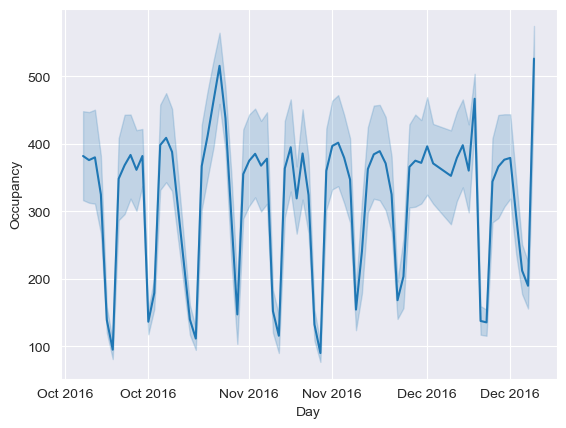

In [49]:
sns.lineplot(
    data=park,
    x='Day',
    y='Occupancy'
);

In [51]:
park.Timestamp.min()

Timestamp('2016-10-04 07:59:42')

In [52]:
park.Timestamp.max()

Timestamp('2016-12-19 16:30:35')

In [53]:
park.Timestamp.describe()

/var/folders/15/n6g6gt4j6pqd8lxz7w7khwhw0000gn/T/ipykernel_4983/680172337.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  park.Timestamp.describe()


count                    2516
unique                   1311
top       2016-10-30 07:59:55
freq                        6
first     2016-10-04 07:59:42
last      2016-12-19 16:30:35
Name: Timestamp, dtype: object

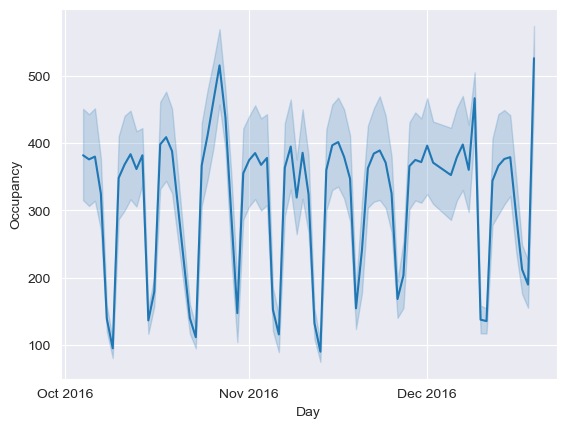

In [61]:
sns.lineplot(
    data=park,
    x='Day', y='Occupancy'
)
plt.xticks(months);
#depicts mean value of cars in garages and thr 95% confidence interval

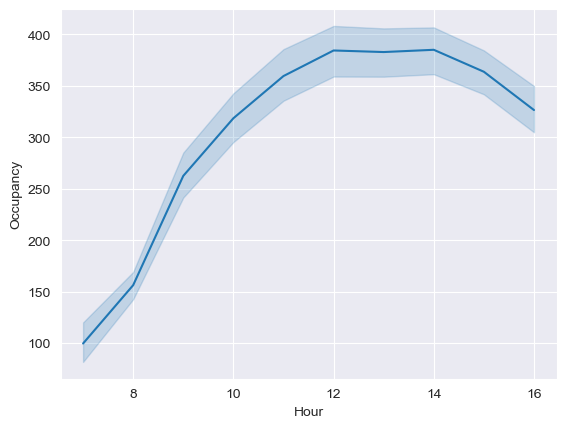

In [63]:
sns.lineplot(data=park, x='Hour', y='Occupancy');
#here aggregation is over a different column

In [65]:
d = park.groupby(['Day'])['Occupancy'].aggregate(['mean'])

In [68]:
d.head()

,mean
Day,
2016-10-04,381.694444
2016-10-05,375.611111
2016-10-06,379.722222
2016-10-07,324.777778
2016-10-08,138.833333


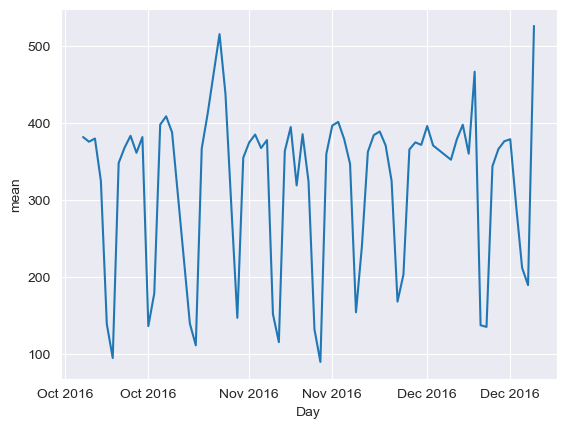

In [70]:
sns.lineplot(data=d, x=d.index, y='mean');

### Bootstrapping
- If there are multiple values in an instance of time, sns will calculate the mean for the solid line through average
- It uses bootstrapping to calculate the confidence interval
- Bootstrap datasets are created for each instance of time in question. The sample taken for that interval is the same size as the observations in that interval. The way the sample is gathered is my using a uniform distribution with replacement. Every value has an equal chance of getting picked and can be replaced. We may have some values picked multiple times and some values none at all... sns by default will make 1000(n_boot = 1000) bootstrap samples for every instance in time. Then for every value in each bootstrap, we replace the time value with the y value in question. A mean is then calculated for each bootstrap sample with y values replaced. Once those 1000 means are computed for each instance in time, the means are sorted and a confidence interval is calculated such that 95% of these means are within the interval.

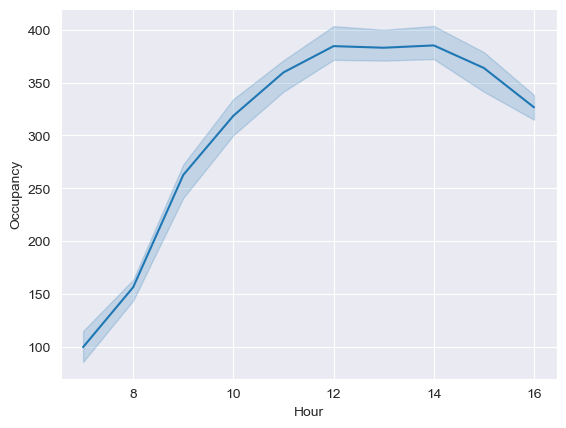

In [72]:
sns.lineplot(data=park, x='Hour', y='Occupancy', n_boot=10);
#here id we run this cell multiple times, we will see a lot of variance in the results we receive since the sample is small

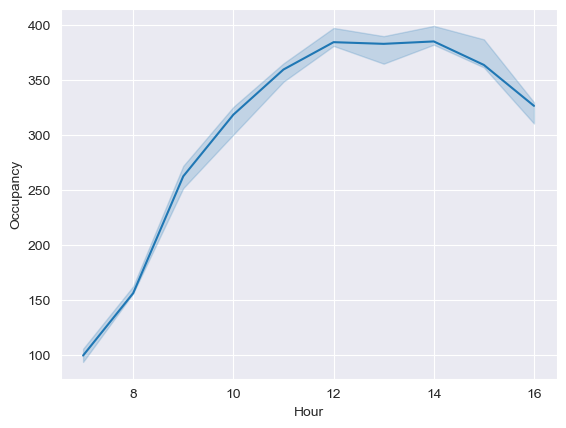

In [74]:
sns.lineplot(data=park, x='Hour', y='Occupancy', n_boot=10, ci=68);
#lower CI will result in a shorter Margin of Error, since we can be more accurate in predicting at a lower CI

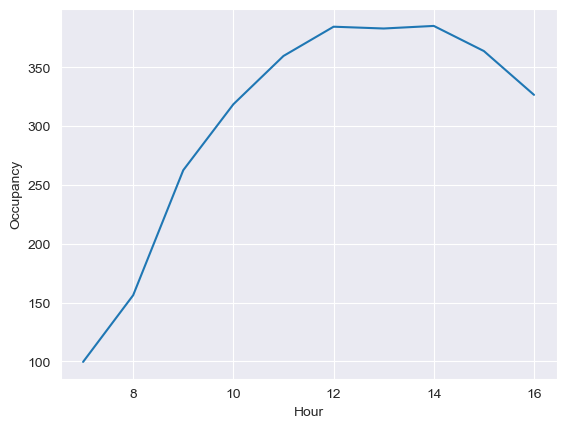

In [76]:
sns.lineplot(data=park, x='Hour', y='Occupancy', n_boot=10, ci=None);

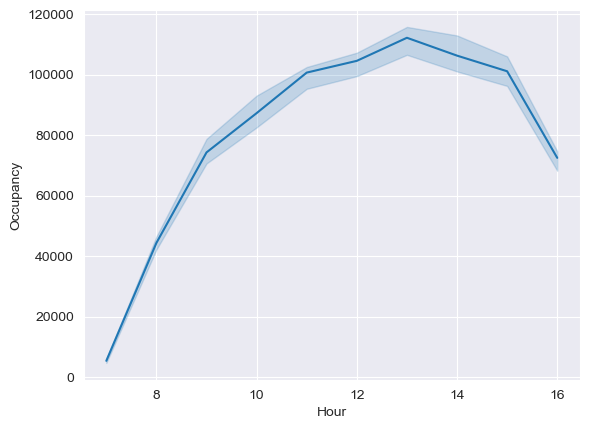

In [77]:
sns.lineplot(data=park, x='Hour', y='Occupancy', n_boot=10, estimator='sum');

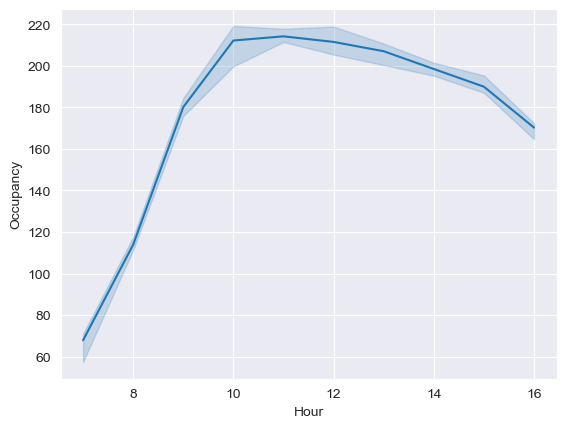

In [78]:
sns.lineplot(data=park, x='Hour', y='Occupancy', n_boot=10, estimator='std');

#### Semantics

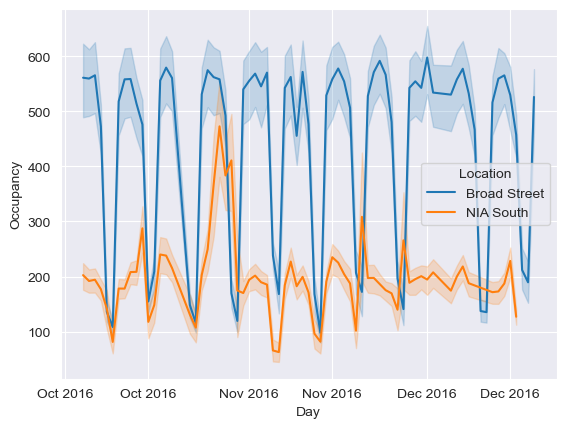

In [81]:
sns.lineplot(data=park, x='Day', y='Occupancy', hue='Location');

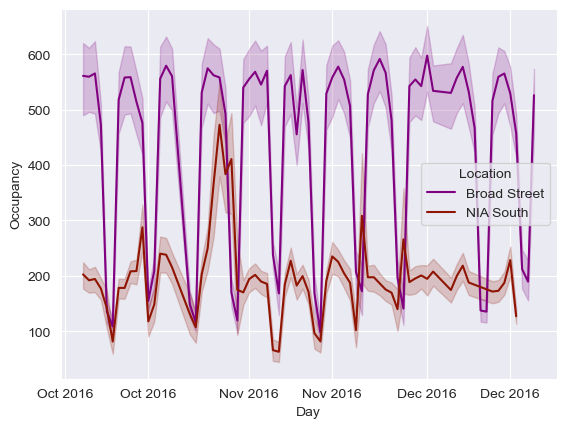

In [83]:
sns.lineplot(data=park, x='Day', y='Occupancy', hue='Location', palette=['purple', 'xkcd:brick red']);

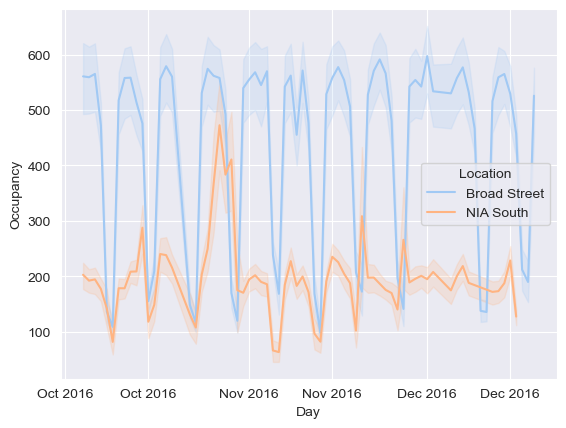

In [84]:
sns.lineplot(data=park, x='Day', y='Occupancy', hue='Location', palette='pastel');

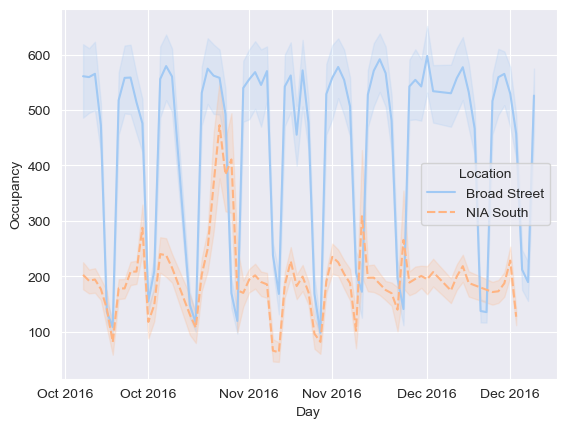

In [85]:
sns.lineplot(data=park, x='Day', y='Occupancy', hue='Location', style='Location', palette='pastel');

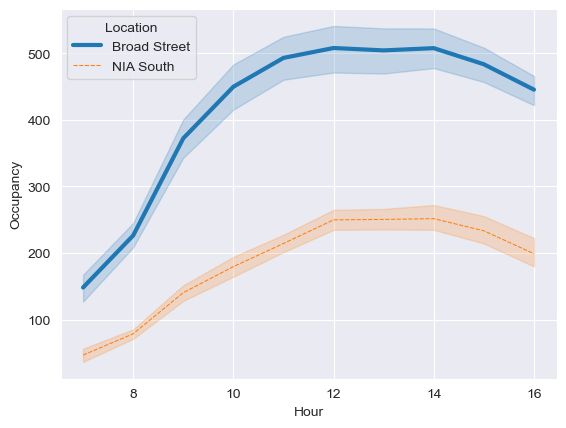

In [86]:
sns.lineplot(data=park, x='Hour', y='Occupancy', style='Location', hue='Location', size='Location');

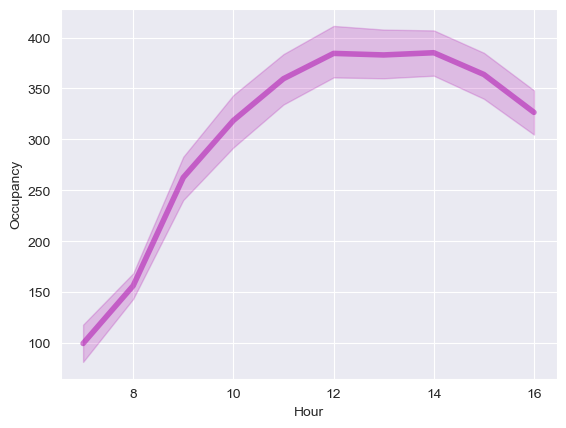

In [87]:
sns.lineplot(data=park, x='Hour', y='Occupancy', lw=4, color='#aa00aa', alpha=0.5);

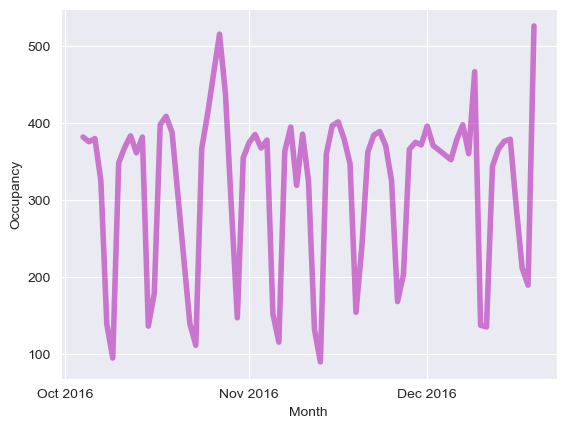

In [96]:
sns.lineplot(data=park, x='Day', y='Occupancy', lw=4, color='#aa00aa', alpha=0.5, ci=None)
plt.xticks(months)
plt.xlabel('Month')
plt.ylabel('Occupancy')
plt.show()